### How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call pi, the typical interval time. The value of the parameter

that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the

you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matplotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.

### Instructions
-    Seed the random number generator with 42.
-    Compute the mean time (in units of number of games) between no-hitters.
-    Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
-    Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, and histtype='step'. Be sure to label your axes.
-    Show your plot.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../data/mlb_nohitters.csv')
nohitter_times = df['game_number'].values

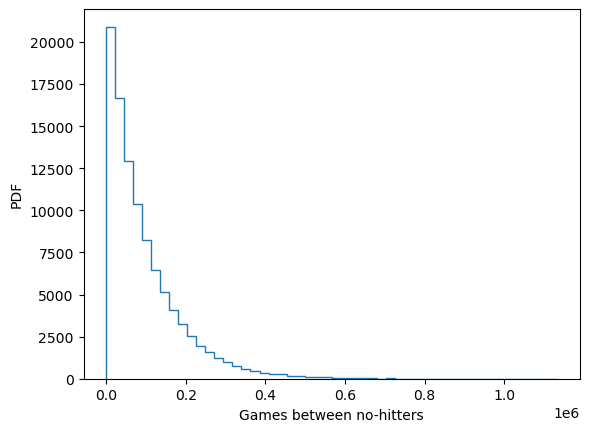

In [6]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
#             bins=50, normed=True, histtype='step')  # normed=True is throwing an error in my enviroment for some reason
             bins=50, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12">function you created in the previous course</a> to compute the ECDF, as well as the code you wrote to <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=13">plot it</a>.

### Instructions
    - Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you wrote in the prequel course.
    - Create a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
    - Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' in addition to x and y inside plt.plot().
    - Set a 2% margin on the plot.
    - Show the plot.

In [7]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

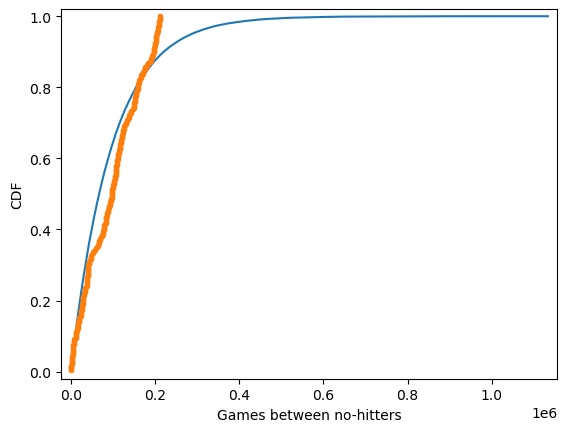

In [8]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

### How is this parameter optimal?

Now sample out of an exponential distribution with
being twice as large as the optimal . Do it again for half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the

you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.
### Instructions
    - Take 10000 samples out of an Exponential distribution with parameter t1/2 = tau/2.
    - Take 10000 samples out of an Exponential distribution with parameter t2 = 2*tau.
    - Generate CDFs from these two sets of samples using your ecdf() function.
    - Add these two CDFs as lines to your plot. This has been done for you, so hit submit to view the plot!

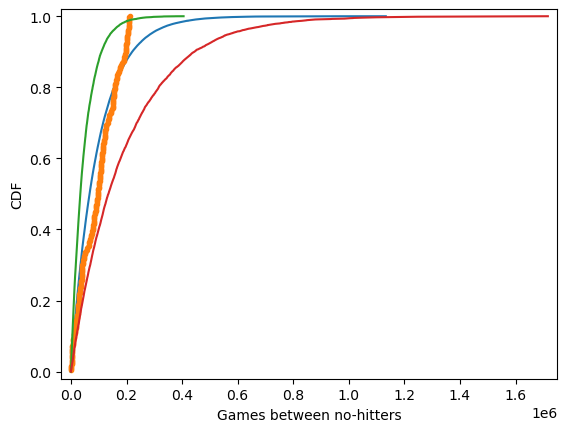

In [9]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

In [17]:
df = pd.read_csv('../../data/female_literacy_fertility.csv')
fertility = df["fertility"].values
illiteracy = (100 - df["female literacy"].values)

def pearson_r(x, y):
    return np.corrcoef(x, y)[0,1]

### EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The NumPy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

### Instructions
    - Plot fertility (y-axis) versus illiteracy (x-axis) as a scatter plot.
    - Set a 2% margin.
    - Compute and print the Pearson correlation coefficient between illiteracy and fertility.

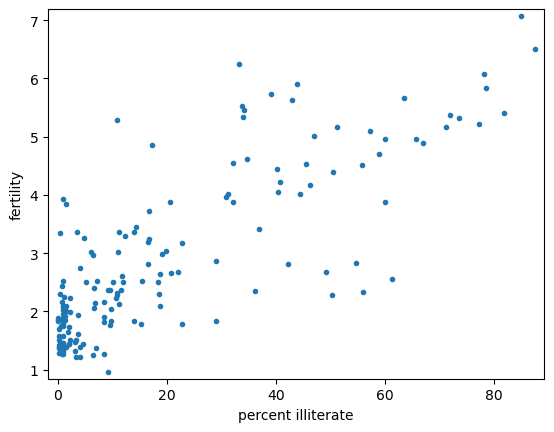

0.8041324026815344


In [18]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

### Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, f = a*i + b, where is the slope and

is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

### Instructions
    - Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and illiteracy on the x-axis.
    - Print out the slope and intercept from the linear regression.
    - To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
    - Plot the data and the regression line on the same plot. Be sure to label your axes.
    - Hit submit to display your plot.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.8880506106365567 children per woman


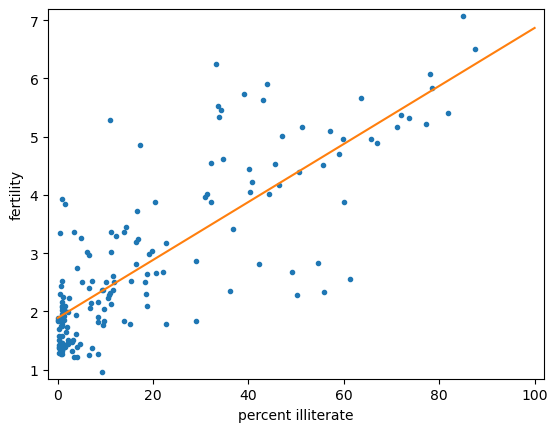

In [19]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### How is it optimal?

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS versus the slope. Where is it minimal?

### Instructions
    - Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you could use np.linspace() like so: np.linspace(0, 0.5, 100).
    - Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above. The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals).
    - Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by np.sum((y_data - a * x_data - b)**2). The variable b you computed in the last exercise is already in your namespace. Here, fertility is the y_data and illiteracy the x_data.
    - Plot the RSS (rss) versus slope (a_vals).
    - Hit submit to see the plot!

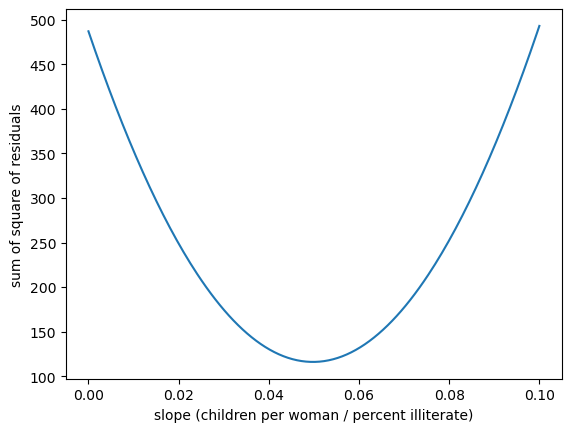

In [20]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

### Linear regression on appropriate Anscombe data

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

### Instructions
    - Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored in the arrays x and y.
    - Print the slope a and intercept b.
    - Generate theoretical x and y data from the linear regression. Your array, which you can create with np.array(), should consist of 3 and 15. To generate the np.array() data, multiply the slope by x_theor and add the intercept.
    - Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.
    - Hit submit to see the plot!

In [21]:
x = [10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]
y = [ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68]

0.5000909090909094 3.000090909090908


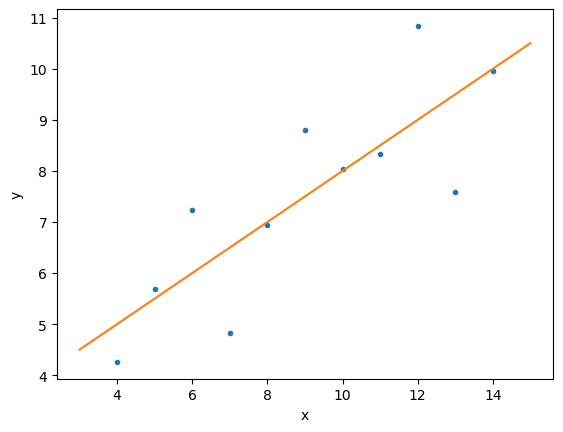

In [22]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### Linear regression on all Anscombe data

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the x values and y values for the second Anscombe data set.

### Instructions

    Write a for loop to do the following for each Anscombe data set.
    Compute the slope and intercept.
    Print the slope and intercept.

In [23]:
anscombe_x = [[10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],
              [10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],
              [10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],
              [ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.]]

anscombe_y = [[ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68],
              [9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74],
              [ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73],
              [ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56, 7.91,  6.89]]

In [24]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000006 intercept: 3.0009090909090883
slope: 0.49972727272727313 intercept: 3.0024545454545453
slope: 0.49990909090909097 intercept: 3.0017272727272717
